# Desafío - Gráficos

# 1 Genere una submuestra de casos

**Mi apellido es SILVA**

**RUT 17270464-6**

Utilice los últimos 4 dígitos de su rut como semilla pseudoaleatoria.

● Seleccione el 50% de los casos.

● Cada base generada debe contener los siguientes elementos:

  ○ El índice de desarrollo humano (`​undp_hdi​`).

  ○ El nombre del país (`​ccodealp​`).

  ○ La región a la que pertenece (`​ht_region​`).

  ○ El PIB per capita. (`​gle_cgdpc​`).

  ○ El total de la población (`​imf_pop​`).



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(4646)

path_drive = "/content/drive/MyDrive/Data Scientist/Desafío Latam/2 .-Fundamentos Data Science/3 .- Variables aleatorias y graficos/Desafíos/qog_std_cs_jan18.csv"
path_normal = "qog_std_cs_jan18.csv"

df = pd.read_csv(path_normal)
df.shape

(194, 1882)

# Si su apellido está entre la N y la Z, escoja las siguientes variables del módulo Salud:

  ○ `wef_imort​`: Infant mortality, deaths/1000 live births.

  ○ `who_alc2000​`: Alcohol consumption per capita (2000-).

  ○ `who_tobt​`: Current smoking of any tobacco product (Total).

  ○ `wdi_exph​`: Government expenditure on health, total (% of GDP).

  ○ Guarde esta tabla procesada en un nuevo objeto.

  ○ Renombre las categorías de la variable `​ht_region​` de números a regiones.

In [2]:
df_sample = df.sample(frac = 0.5)[['cname','undp_hdi','ccodealp','ht_region','gle_cgdpc','imf_pop', 'wef_imort', 'who_alc2000', 'who_tobt', 'wdi_exph']].reset_index(drop=True)
df_sample['ht_region'] = df_sample['ht_region'].replace([1, 2, 3, 4,
5, 6, 7, 8, 9, 10],
['EastEurope', 'LatAm', 'NorthAfrica',
'SubSaharian', 'WesternDem', 'EastAsia',
'SouthEastAsia','SouthAsia','Pacific', 'Caribbean' ])
print(df_sample.head(10))
df_sample.shape

        cname  undp_hdi ccodealp      ht_region   gle_cgdpc    imf_pop  \
0    Barbados     0.794      BRB      Caribbean  22888.9710   0.279000   
1      Zambia     0.576      ZMB    SubSaharian   1916.7900        NaN   
2     Albania     0.762      ALB     EastEurope   8516.7002        NaN   
3  Seychelles     0.781      SYC    SubSaharian   9583.3203   0.090000   
4     Belarus     0.798      BLR     EastEurope  17780.6410   9.468000   
5    Thailand     0.738      THA  SouthEastAsia   9295.5703  68.656998   
6   Australia     0.937      AUS     WesternDem  38611.9490  23.621000   
7     Somalia       NaN      SOM    SubSaharian   1436.7400        NaN   
8  Uzbekistan     0.697      UZB     EastEurope   7370.7202  29.746000   
9     Andorra     0.857      AND     WesternDem  32367.3300        NaN   

   wef_imort  who_alc2000   who_tobt  wdi_exph  
0  16.900000     8.820000   7.000000  7.469303  
1  56.400002     2.410000  15.900000  4.986765  
2  15.000000     4.510000  29.700001  

(97, 10)

# 2. Genere una función que ingrese su objeto y devuelva:


# a) Por cada variable existente en su objeto, calcule las medidas descriptivas para los casos continuos.

In [3]:
def funcion_a(dataframe):
  return dataframe.describe()

funcion_a(df_sample)

,undp_hdi,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph
count,93.000000,97.000000,72.000000,73.000000,92.000000,68.000000,95.000000
mean,0.697183,12814.916290,34.029014,22.931507,4.678804,23.197059,6.434198
std,0.147801,15896.673542,60.723209,20.593863,3.823352,9.941740,2.556891
min,0.414000,332.269990,0.012000,1.800000,0.000000,4.700000,1.475303
25%,0.582000,2658.510000,1.884250,6.300000,0.985000,16.175001,4.903553
50%,0.724000,6649.140100,6.913500,15.100000,3.825000,22.700000,5.933197
75%,0.798000,17780.641000,34.284250,32.799999,7.535000,29.024999,7.805775
max,0.938000,108481.130000,318.789001,79.599998,15.190000,54.000000,17.140755


# b) Para cada variable discreta, que calcule la frecuencia.

In [4]:
 def funcion_b(dataframe):
   #Obtengo el listado de columnas discretas
   discretas = dataframe.dtypes.reset_index().rename(columns = {'index': "column", 0:'type'})
   discretas = list(discretas[discretas['type'] == 'object']['column'])

   #Genero la lista donde van a quedar las frecuencias de cada columna
   a = []

   #Genero el contador para ir columna por columna
   j = 0
   #Itero sobre cada columna discreta y lo guardo en la lista recién creada
   for i in discretas:
     a[j] = a.append(dataframe[i].value_counts())
   return a

funcion_b(df_sample)

[None,
 SLB    1
 HRV    1
 SYC    1
 MNG    1
 PAK    1
       ..
 SOM    1
 GBR    1
 MCO    1
 ERI    1
 LBR    1
 Name: ccodealp, Length: 97, dtype: int64,
 SubSaharian      20
 EastEurope       17
 NorthAfrica      12
 LatAm            11
 WesternDem        9
 SouthEastAsia     9
 Caribbean         7
 Pacific           7
 EastAsia          4
 SouthAsia         1
 Name: ht_region, dtype: int64]

# c) Reporte las estadísticas descriptivas para: 
    ​○ gle_cgdpc​
    ○ undp_hdi​
    ○ ​imf_pop​

Compare las estadísticas con algún compañero.
¿Ve alguna diferencia sustancial en alguna de ellas?

In [5]:
def funcion_c(dataframe):
  df = dataframe[['gle_cgdpc','undp_hdi','imf_pop']].describe()
  return df

print(funcion_c(df_sample))
print("")
print("Sí, son distintas, y es por el np.ranodm.seed que se definió al principio")

           gle_cgdpc   undp_hdi     imf_pop
count      97.000000  93.000000   72.000000
mean    12814.916290   0.697183   34.029014
std     15896.673542   0.147801   60.723209
min       332.269990   0.414000    0.012000
25%      2658.510000   0.582000    1.884250
50%      6649.140100   0.724000    6.913500
75%     17780.641000   0.798000   34.284250
max    108481.130000   0.938000  318.789001

Sí, son distintas, y es por el np.ranodm.seed que se definió al principio


# 3 Genere una función que liste las observaciones perdidas de una variable

# a)
- La función debe contener los siguientes argumentos:

    ○ <code>dataframe</code>​: La función debe ingresar un objeto DataFrame.

    ○ <code>var​</code>: Variable a inspeccionar.

    ○ <code>print_list</code>​: Opción para imprimir la lista de observaciones perdidas en la variable. Debe ser False por defecto.

- La función debe retornar la cantidad de casos perdidos y el porcentaje correspondiente.
- Cuando ​<code>print_list = **​True​**</code>, debe retornar la lista de casos.

In [6]:
def funcion3a(dataframe, var, print_list = False):
  if print_list == False:
    cantidad = dataframe[var].isnull().value_counts()[0]
    return [len(dataframe)-cantidad,(len(dataframe)-cantidad)/len(dataframe)]
  else:
    return list(dataframe[dataframe[var].isnull()][var])

funcion3a(df_sample,'undp_hdi', print_list= False)


[4, 0.041237113402061855]

# b) (cree una nueva función) con los mismos parámetros pero sin "var" (porque no tiene sentido):


- Analice todas las variables y sus casos perdidos.

- Para las 3 variables con un mayor porcentaje de casos perdidos, solicite la lista de países con ausencia de datos.

In [7]:
def funcion3b(dataframe):
  top3 = list(dataframe.isnull().sum().sort_values(ascending = False)[0:3].index) # Lista de top 3 variables con más NaN's
  dataframe = dataframe[
                 pd.isna(dataframe[top3[0]]) &
                 pd.isna(dataframe[top3[1]]) &
                 pd.isna(dataframe[top3[2]])
  ][['cname',top3[0],top3[1],top3[2]]]
  print(dataframe)
  return(list(dataframe['cname']))

funcion3b(df_sample)

                  cname  who_tobt  imf_pop  wef_imort
7               Somalia       NaN      NaN        NaN
17  Antigua and Barbuda       NaN      NaN        NaN
19   St Kitts and Nevis       NaN      NaN        NaN
35        Guinea-Bissau       NaN      NaN        NaN
43         Turkmenistan       NaN      NaN        NaN
44              Eritrea       NaN      NaN        NaN
72    Equatorial Guinea       NaN      NaN        NaN
74             Dominica       NaN      NaN        NaN
80             Djibouti       NaN      NaN        NaN
93         Korea, North       NaN      NaN        NaN
95               Monaco       NaN      NaN        NaN


['Somalia',
 'Antigua and Barbuda',
 'St Kitts and Nevis',
 'Guinea-Bissau',
 'Turkmenistan',
 'Eritrea',
 'Equatorial Guinea',
 'Dominica',
 'Djibouti',
 'Korea, North',
 'Monaco']

# 4 Grafique los histogramas

# a)

- Genere una función que grafique un histograma en conjunto y señala las medias.
- La función debe incluir los siguientes argumentos:

    ○ <code>dataframe</code>​: La base de datos donde se encuentran los datos específicos.

    ○ <code>var​</code>: La variable a graficar.

    ○ <code>sample_mean​</code>: Booleano.Si es verdadero, debe generar una recta vertical indicando la media de la variable en la selección muestral. Por defecto debe ser **`False​`**.

    ○ <code>true_mean</code>​: Booleano. Si es verdadero, debe generar una recta vertical indicando la media de variable en la base de datos completa.

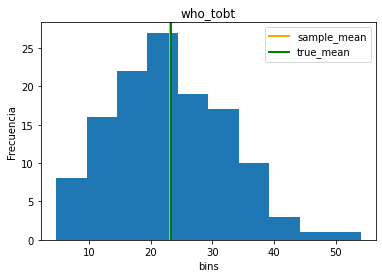

In [8]:
def funcion4(dataframe,var,sample_mean = False, true_mean = False):
  np.random.seed(4646) # Ya que lo necesitamos tener para hacer el desafío 4b)
  
  df_sample = dataframe.sample(frac = 0.5)

  #Grafico el histograma del dataframe de la muestra
  plt.hist(dataframe[var])
  if sample_mean:
    plt.axvline(df_sample[var].mean(), color = 'orange', lw = 2 ,label = "sample_mean")
  if true_mean:
    plt.axvline(dataframe[var].mean(), color = 'green', lw = 2, label = "true_mean")
  plt.title(var)
  plt.ylabel("Frecuencia")
  plt.xlabel("bins")
  plt.legend()

funcion4(df,'who_tobt', sample_mean = True, true_mean = True)

# b) Implemente las funciones para las 4 variables seleccionadas según su grupo. ¿En qué variables la media de la submuestra es mayor a la de la muestra completa?






¿En qué variables la media de la submuestra es mayor a la de la muestra completa?

Respuesta: En ningún caso, en todos los gráficos la vertical naranja (submuestra) es MENOR que la verde (muestra)



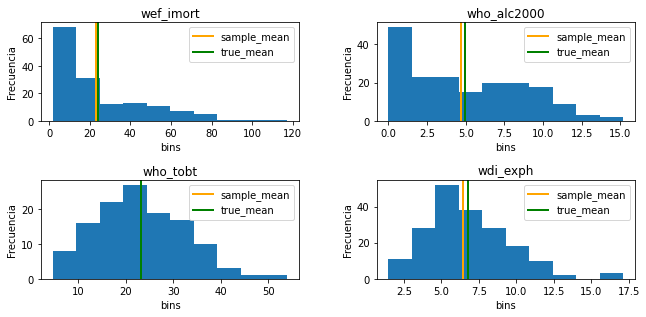

In [9]:
plt.subplots_adjust(left=0.125,
                    bottom=0.01, 
                    right=1.5, 
                    top=0.9,
                    wspace= 0.3, 
                    hspace=0.6)

variables_solicitadas = ['wef_imort','who_alc2000','who_tobt','wdi_exph']

j = 1
for i in variables_solicitadas:
    plt.subplot(2, 2, j)
    funcion4(df,i, sample_mean = True, true_mean = True)
    print("")
    j += 1

print("""
¿En qué variables la media de la submuestra es mayor a la de la muestra completa?

Respuesta: En ningún caso, en todos los gráficos la vertical naranja (submuestra) es MENOR que la verde (muestra)
""")

# 5 Genere una función que devuelva un dotplot

- La función debe contener los siguientes argumentos como argumentos:

    ○ <code>dataframe</code>: La tabla de datos donde buscar las variables.

    ○ <code>plot_var</code>: La variable a analizar y extraer las medias.

    ○ <code>plot_by</code>: La variable agrupadora.

    ○ <code>global_stat</code>: Booleano. Si es True debe graficar la media global de la variable. Por defecto debe ser <code>False </code>.

    ○ `statistic`: Debe presentar dos opciones. <code>​mean</code> para la media y​ <code>median</code> para la mediana. Por defecto debe ser <code>mean</code>.



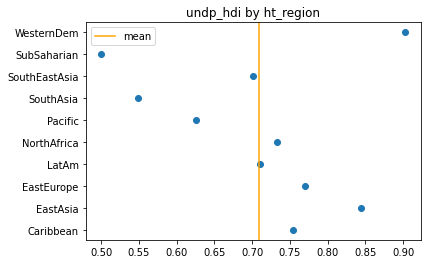

In [10]:
def funcion5(dataframe, plot_var, plot_by, global_stat = False, statistic = "mean"):
    
    grouped_mean = dataframe.groupby(dataframe[plot_by])[plot_var].mean()
    
    plt.scatter(grouped_mean.values,grouped_mean.index)
    if global_stat:
        if statistic == 'mean':
          plt.axvline(x = grouped_mean.mean(), color = 'orange', label = 'mean')
        if statistic == 'median':
          plt.axvline(x = grouped_mean.median(), color = 'green', label = 'median')
    plt.title(f"{plot_var} by {plot_by}")
    plt.legend()
funcion5(df_sample,'undp_hdi', 'ht_region',global_stat = True, statistic = 'mean')

# Implemente la función en las 3 variables con una menor cantidad de datos perdidos.

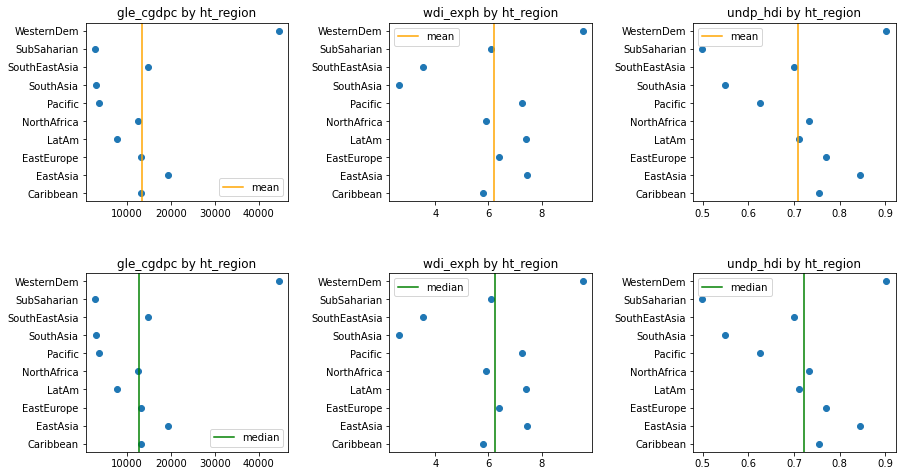

In [11]:
#Selecciono sólo las variables numeric de df_sapmle
num_vars = df_sample.dtypes.reset_index().rename(columns = {'index': "column", 0:'type'})
num_vars = list(num_vars[num_vars['type'] == 'float']['column'])

#Selecciono las 3 con menor cantidad de missing values
top3min = list(df_sample[num_vars].isnull().sum().sort_values(ascending = True)[0:3].index)

plt.subplots_adjust(left=0.125,
                    bottom=0.01, 
                    right=2, 
                    top=1.5,
                    wspace= 0.5, 
                    hspace=0.4)

j = 1
for k in ['mean','median']:
    for i in top3min:
      plt.subplot(2, 3, j)
      funcion5(df_sample,i, 'ht_region', global_stat = True, statistic = k)
      j += 1

# 6 Guarde la base de datos

- La submuestra creada tiene un método llamado `​to_csv`

  Acceda a este y guarde la base de datos con la siguiente nomenclatura: `subsample_<iniciales>_demo.csv​.`
  
  (Subela a la plataforma, junto al desafío)

In [12]:
df_sample.to_csv("subsample_FASC_demo.csv")